## **ATR (Average True Range):**

   - *__Purpose__*: ATR measures volatility by considering the range between high and low prices.
   - *__Activation and Usage__*: Use the `talib.ATR` function in Python. ATR values can help determine position size and stop loss levels.
   - *__Strategy__*: Higher ATR values indicate higher volatility, potentially leading to wider price swings.
   - *__Key Points__*: Combine ATR with other indicators to manage risk and position size.
   - *__Effective Conditions__*: ATR is valuable in assessing market volatility and setting appropriate risk parameters.

In [3]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(talib.ATR.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 ATR(high, low, close[, timeperiod=?])

    Average True Range (Volatility Indicators)

    Inputs:
        prices: ['high', 'low', 'close']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


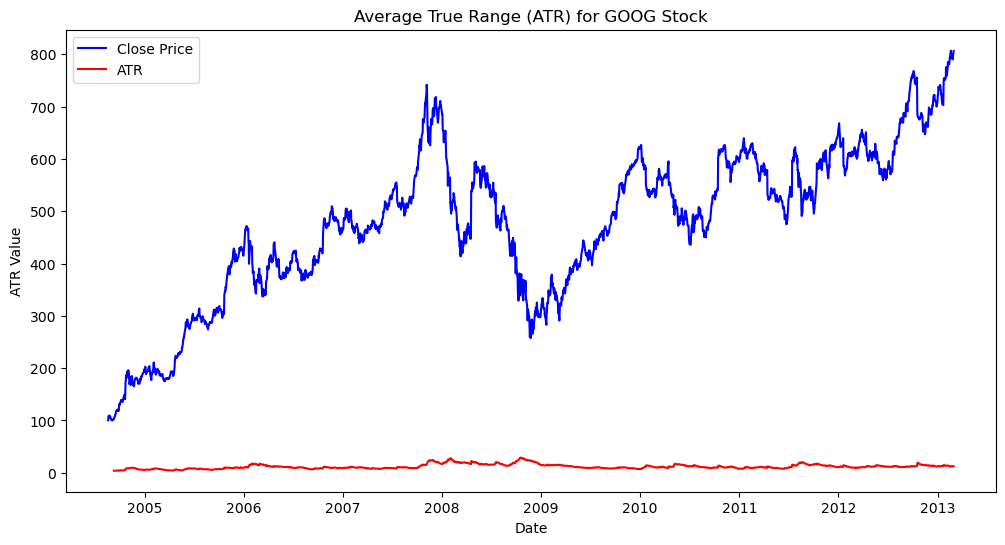

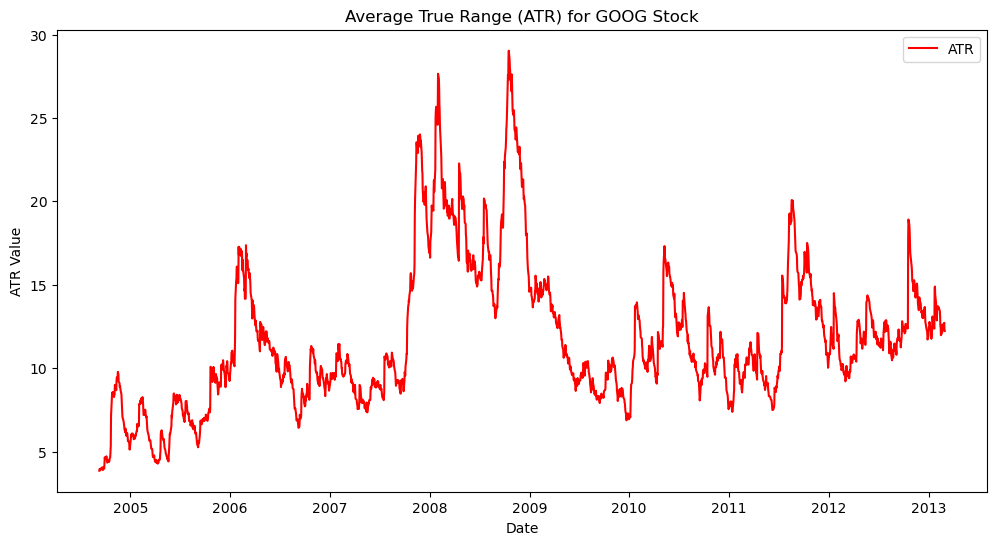

             close        atr
2004-08-19  100.34        NaN
2004-08-20  108.31        NaN
2004-08-23  109.40        NaN
2004-08-24  104.87        NaN
2004-08-25  106.00        NaN
...            ...        ...
2013-02-25  790.77  12.648062
2013-02-26  790.13  12.569629
2013-02-27  799.78  12.716084
2013-02-28  801.20  12.322793
2013-03-01  806.19  12.227593

[2148 rows x 2 columns]


In [5]:
# Calculate the ATR
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
timeperiod = 14
atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the ATR
plt.plot(GOOG.index, atr, label='ATR', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('Average True Range (ATR) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('ATR Value')

# Show the plot
plt.show()

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the ATR
plt.plot(GOOG.index, atr, label='ATR', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('Average True Range (ATR) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('ATR Value')

# Show the plot
plt.show()

technologies = {'close':close_prices, 'atr': atr}
df = pd.DataFrame(technologies)
print(df)           
# print (atr)

In [10]:

# Generate sample data
num_samples = 100
num_features = 5
data = np.random.rand(num_samples, num_features)  # Generate random data between 0 and 1

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)  # Set rowvar=False to treat columns as variables

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 0.08060221  0.01143145 -0.00663297 -0.00534117 -0.01675115]
 [ 0.01143145  0.08418985 -0.0043031   0.00189498 -0.00654518]
 [-0.00663297 -0.0043031   0.10552026 -0.01335727 -0.00257109]
 [-0.00534117  0.00189498 -0.01335727  0.07158309 -0.00241453]
 [-0.01675115 -0.00654518 -0.00257109 -0.00241453  0.08640417]]


In [6]:
def optim_func(series):
    if series['# Trades'] < 15 or series['Max. Drawdown [%]'] < -10:
        return -9999
    
    eq_final = series['Equity Final [$]']
    win_rate = series['Win Rate [%]']
    return eq_final *win_rate

class AtrStrategy(Strategy):
    atr_timeperiod = 14
    atr_threshold = 2.0  # ATR threshold for generating signals
    atr_num = 10
        
    def init(self):
        self.atr = self.I(talib.ATR, self.data.High, self.data.Low, self.data.Close, timeperiod=self.atr_timeperiod)

    def next(self):
        if self.atr[-1] > self.atr_threshold:
            if not self.position:
                self.buy(sl=self.data.Close[-1]*0.95, tp=self.data.Close[-1]*1.05 )
        elif self.atr[-1] < self.atr_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AtrStrategy, cash=10_000)
stats = bt.optimize(
    atr_timeperiod = range(4, 50, 7),
    atr_threshold = range(2, 50, 7),
    maximize= optim_func,
    max_tries=100)
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    99.72067
Equity Final [$]                    36176.553
Equity Peak [$]                    51929.6125
Return [%]                          261.76553
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   16.282351
Volatility (Ann.) [%]               36.271617
Sharpe Ratio                         0.448901
Sortino Ratio                        0.806851
Calmar Ratio                         0.217237
Max. Drawdown [%]                  -74.952168
Avg. Drawdown [%]                   -6.404839
Max. Drawdown Duration     1908 days 00:00:00
Avg. Drawdown Duration       67 days 00:00:00
# Trades                                  301
Win Rate [%]                        55.149502
Best Trade [%]                      17.465926
Worst Trade [%]                    -11.491559
Avg. Trade [%]                    

In [8]:
def mean(data):
    return sum(data) / len(data)

def covariance(x, y):
    if len(x) != len(y):
        raise ValueError("Input lists must have the same length")

    x_mean = mean(x)
    y_mean = mean(y)

    covar = 0
    for i in range(len(x)):
        covar += (x[i] - x_mean) * (y[i] - y_mean)

    covar /= len(x) - 1  # Use N-1 for sample covariance

    return covar

# Example data
data_x = [1, 2, 3, 4, 5]
data_y = [2, 3, 4, 5, 6]

covariance_result = covariance(data_x, data_y)
print("Covariance:", covariance_result)


Covariance: 2.5


Text(0, 0.5, 'Value')

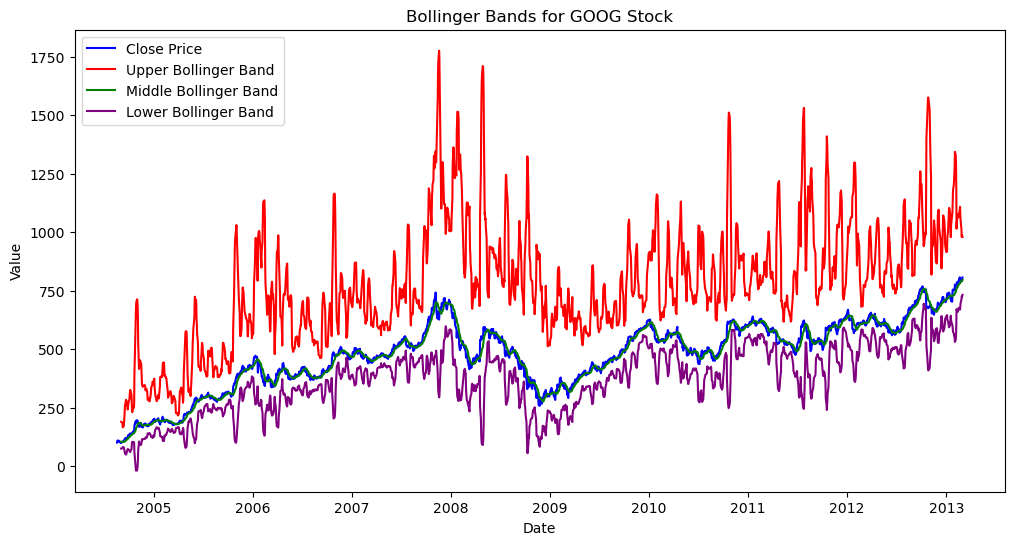

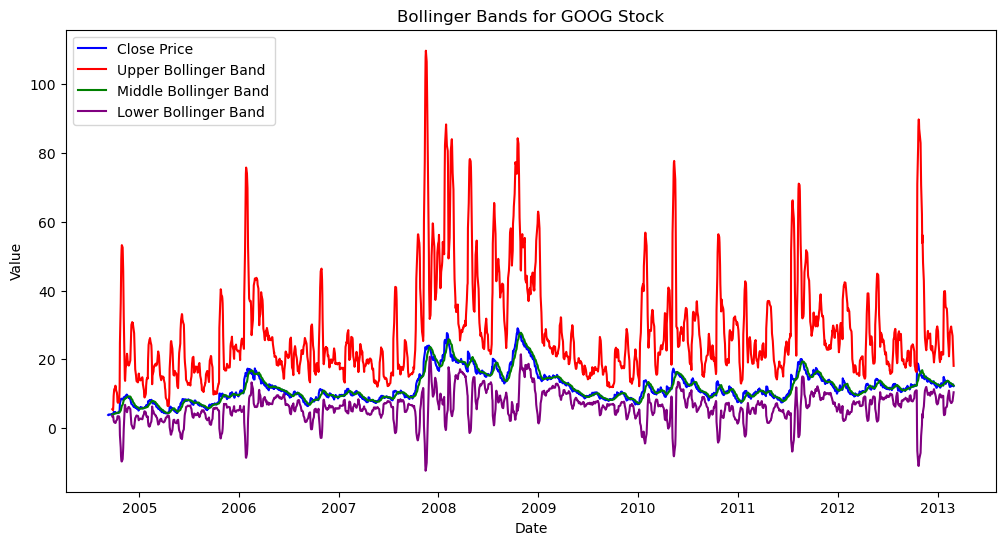

In [12]:
# Calculate the ATR
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
timeperiod = 14
atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# dsjik

timeperiod = 12
nbdevup = 26
nbdevdn = 9
matype = 0

# Calculate the MACD, MACD Signal, and MACD Histogram
upperband, middleband, lowerband = talib.BBANDS(close_prices, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)
upperband_atr, middleband_atr, lowerband_atr = talib.BBANDS(atr, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, upperband, label='Upper Bollinger Band', color='red')
plt.plot(GOOG.index, middleband, label='Middle Bollinger Band', color='green')
plt.plot(GOOG.index, lowerband, label='Lower Bollinger Band', color='purple')

# Add legend
plt.legend()

# Add title and labels
plt.title('Bollinger Bands for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')



#  atr 
upperband_atr, middleband_atr, lowerband_atr = talib.BBANDS(atr, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)
# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, atr, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, upperband_atr, label='Upper Bollinger Band', color='red')
plt.plot(GOOG.index, middleband_atr, label='Middle Bollinger Band', color='green')
plt.plot(GOOG.index, lowerband_atr, label='Lower Bollinger Band', color='purple')

# Add legend
plt.legend()

# Add title and labels
plt.title('Bollinger Bands for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')



             close        atr    upperband  middleband   lowerband  \
2004-08-19  100.34        NaN          NaN         NaN         NaN   
2004-08-20  108.31        NaN          NaN         NaN         NaN   
2004-08-23  109.40        NaN          NaN         NaN         NaN   
2004-08-24  104.87        NaN          NaN         NaN         NaN   
2004-08-25  106.00        NaN          NaN         NaN         NaN   
...            ...        ...          ...         ...         ...   
2013-02-25  790.77  12.648062  1013.972992  789.277500  711.498291   
2013-02-26  790.13  12.569629   980.535069  790.625833  724.888021   
2013-02-27  799.78  12.716084   987.416159  791.826667  724.122612   
2013-02-28  801.20  12.322793   984.609628  793.391667  727.200834   
2013-03-01  806.19  12.227593   979.002362  795.515833  732.001266   

            upperband_atr  middleband_atr  lowerband_atr  
2004-08-19            NaN             NaN            NaN  
2004-08-20            NaN             NaN

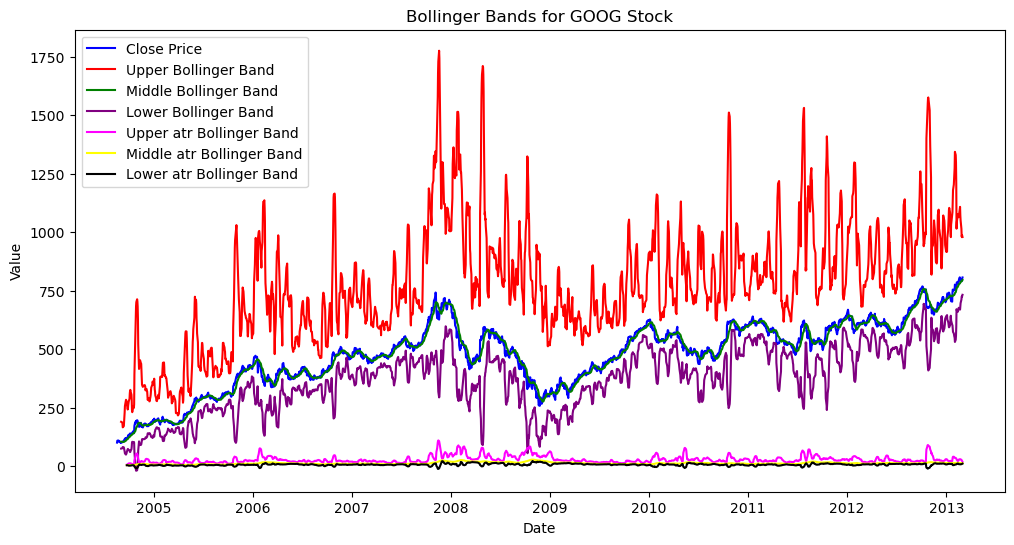

In [15]:
# Calculate the ATR
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
timeperiod = 14
atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# dsjik

timeperiod = 12
nbdevup = 26
nbdevdn = 9
matype = 0

# Calculate the MACD, MACD Signal, and MACD Histogram
upperband, middleband, lowerband = talib.BBANDS(close_prices, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)
upperband_atr, middleband_atr, lowerband_atr = talib.BBANDS(atr, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, upperband, label='Upper Bollinger Band', color='red')
plt.plot(GOOG.index, middleband, label='Middle Bollinger Band', color='green')
plt.plot(GOOG.index, lowerband, label='Lower Bollinger Band', color='purple')

upperband_atr, middleband_atr, lowerband_atr = talib.BBANDS(atr, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)
plt.plot(GOOG.index, upperband_atr, label='Upper atr Bollinger Band', color='magenta')
plt.plot(GOOG.index, middleband_atr, label='Middle atr Bollinger Band', color='yellow')
plt.plot(GOOG.index, lowerband_atr, label='Lower atr Bollinger Band', color='black')

# Add legend
plt.legend()

# Add title and labels
plt.title('Bollinger Bands for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')


technologies = {'close':close_prices, 'atr': atr, 'upperband':upperband,'middleband': middleband,'lowerband': lowerband,'upperband_atr' :upperband_atr,'middleband_atr' :middleband_atr,'lowerband_atr' :lowerband_atr}
df = pd.DataFrame(technologies)
print(df)      

In [ ]:
atr = lambda data :  1-(1 /talib.ATR(data)[-1])


print(atr(GOOG))